In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('water_potabilitydata.csv')

In [4]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df['ph'].isnull().sum()

491

In [9]:
df['Sulfate'].isnull().sum()

781

In [10]:
df['ph'] = df['ph'].interpolate(method="pad", limit=2)

In [11]:
df['Sulfate'] = df['Sulfate'].interpolate(method="pad", limit=2)

In [12]:
df = df.dropna()

In [13]:
len(df)

3076

In [14]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.05786,6.635246,368.516441,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,368.516441,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [15]:
df.to_csv('cleaned_df.csv')

Data Correlation

In [16]:
import matplotlib.pyplot as plt

df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.067419,-0.077059,-0.028783,0.005796,0.015095,0.040706,0.004144,-0.045637,-0.010071
Hardness,0.067419,1.000000,-0.042483,-0.035693,-0.082768,-0.019223,0.008246,-0.013306,-0.020776,-0.010181
Solids,-0.077059,-0.042483,1.000000,-0.068165,-0.104322,0.016694,0.010325,-0.009517,0.018178,0.030460
Chloramines,-0.028783,-0.035693,-0.068165,1.000000,0.021282,-0.020749,-0.020343,0.021057,0.004193,0.026568
Sulfate,0.005796,-0.082768,-0.104322,0.021282,1.000000,-0.000536,0.011601,-0.025117,0.007283,-0.019982
Conductivity,0.015095,-0.019223,0.016694,-0.020749,-0.000536,1.000000,0.028524,0.001123,-0.001829,-0.006287
Organic_carbon,0.040706,0.008246,0.010325,-0.020343,0.011601,0.028524,1.000000,-0.010889,-0.013148,-0.031551
Trihalomethanes,0.004144,-0.013306,-0.009517,0.021057,-0.025117,0.001123,-0.010889,1.000000,-0.021713,0.005241
Turbidity,-0.045637,-0.020776,0.018178,0.004193,0.007283,-0.001829,-0.013148,-0.021713,1.000000,0.005783
Potability,-0.010071,-0.010181,0.030460,0.026568,-0.019982,-0.006287,-0.031551,0.005241,0.005783,1.000000


In [17]:
import seaborn as sns

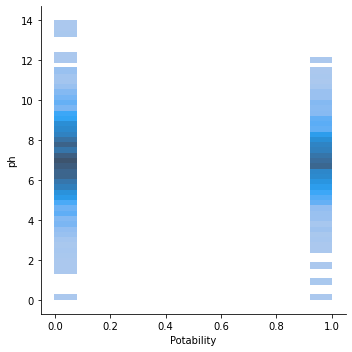

In [18]:
sns.displot(y = df.ph, x = df.Potability, kind = 'hist')

<Figure size 1440x864 with 0 Axes>

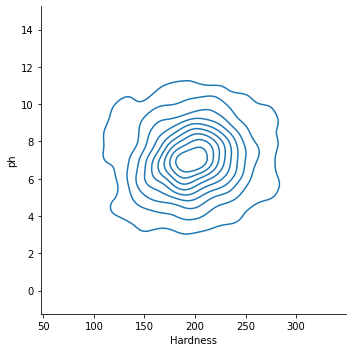

In [19]:
plt.figure(figsize=(20,12))
sns.displot(y = df.ph, x = df.Hardness, kind = 'kde')

In [20]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

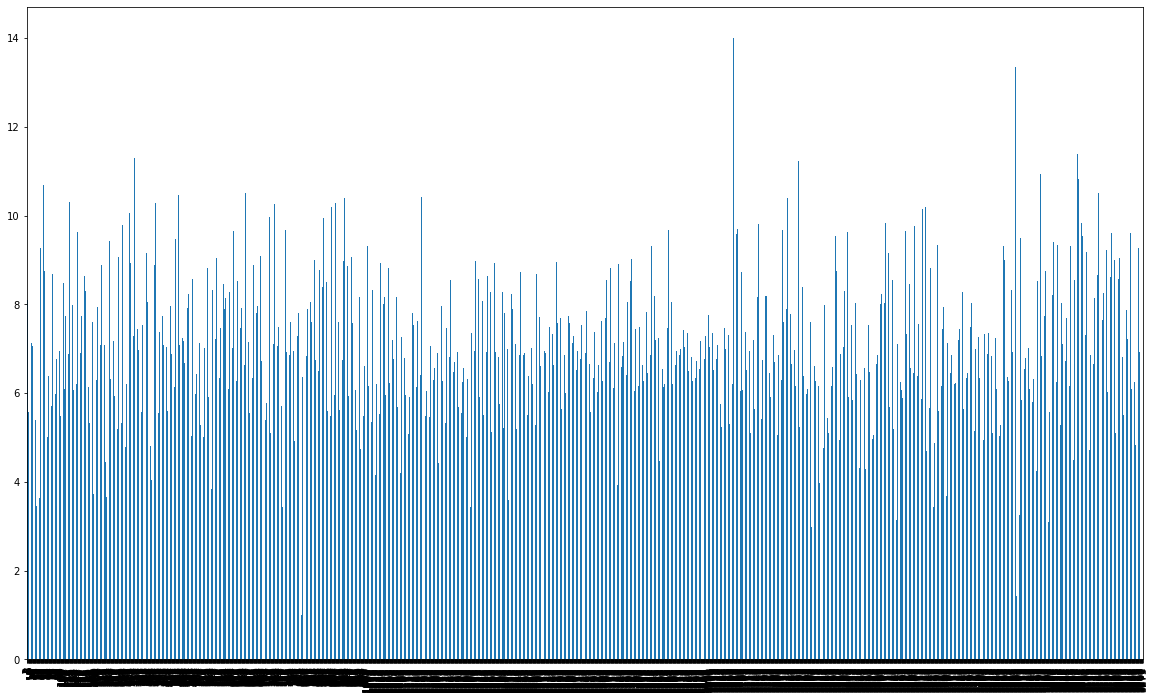

In [21]:
plt.figure(figsize=(20,12))
df.ph.plot(kind = 'bar')

In [22]:
ph_list = [round(item) for item in df.ph]

In [23]:
import collections
c = collections.Counter(ph_list)
c

Counter({4: 116,
         8: 616,
         9: 333,
         6: 620,
         10: 144,
         11: 43,
         7: 862,
         5: 291,
         3: 30,
         2: 5,
         0: 2,
         12: 7,
         1: 3,
         14: 2,
         13: 2})

<BarContainer object of 15 artists>

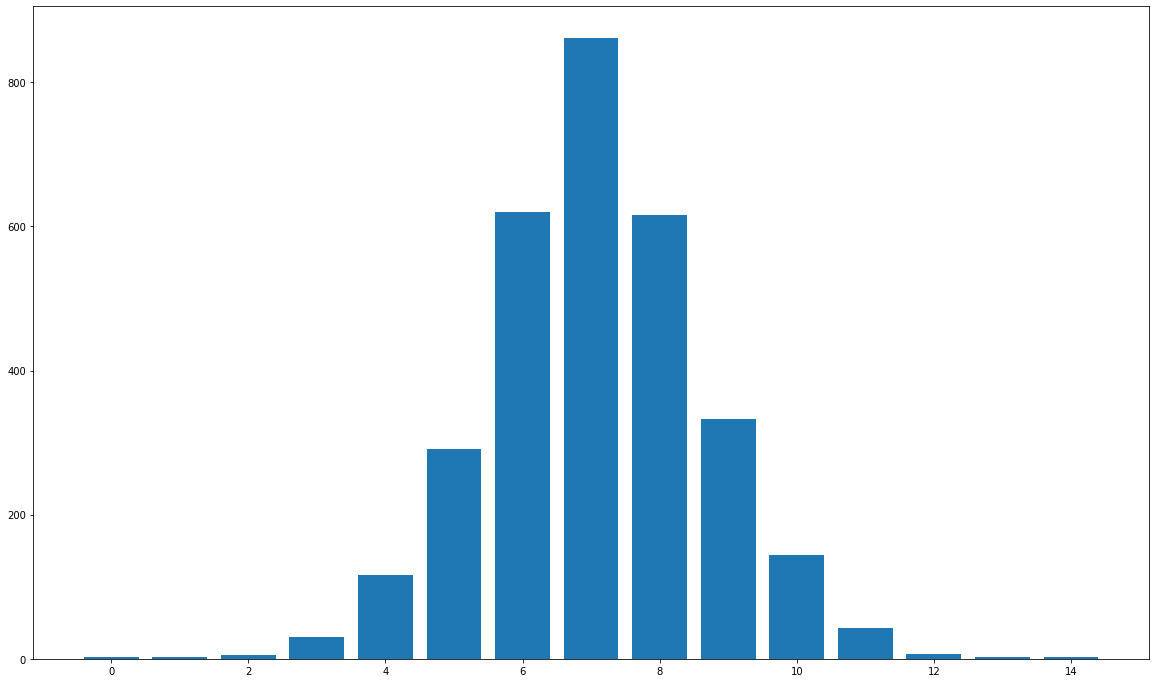

In [24]:
plt.figure(figsize=(20,12))
plt.bar(c.keys(), c.values())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


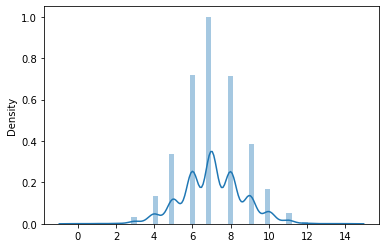

In [ ]:
sns.distplot(ph_list).get_lines()[0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


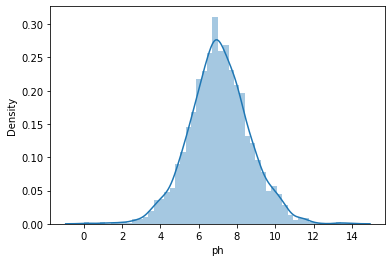

In [ ]:
sns.distplot(df.ph).get_lines()[0]

## Machine Learning Model

In [25]:
y = df.Potability # target
X = df.drop(columns='Potability')

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

hist = model.fit(X_train,y_train)

In [28]:
y_pred=model.predict(X_test)

y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


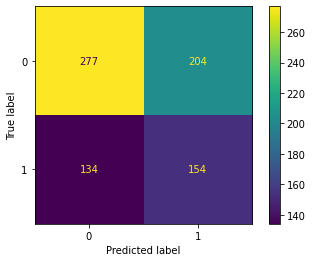

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 56.05


In [31]:
confusion_matrix(y_pred,y_test)

array([[277, 134],
       [204, 154]])

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

tmp_data = scaler.fit(X)

X_scaled = scaler.transform(X)

In [33]:
X_scaled

array([[0.26543429, 0.22405276, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.60386556, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       [0.59405471, 0.5643559 , 0.35624379, ..., 0.62208906, 0.80806473,
        0.60101542],
       ...,
       [0.43354398, 0.45333496, 0.42389469, ..., 0.37806972, 0.48418751,
        0.41968457],
       [0.33343583, 0.48146718, 0.7759474 , ..., 0.44806201, 0.53503671,
        0.56453411],
       [0.67282217, 0.40968509, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996]])

Decision Tree With Scaling

1.   List item
2.   List item

After MIn Max Scaler

Accuracy 58.13
Down Confusion Matrix

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

model_1=DecisionTreeClassifier()

model_1.fit(X_train,y_train)

y_pred=model_1.predict(X_test)

accuracy=accuracy_score(y_pred,y_test)*100

print("Accuracy of the model_1 is {:.2f}".format(accuracy))

Accuracy of the model_1 is 58.13


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


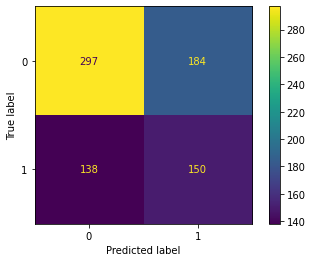

In [35]:
plot_confusion_matrix(model_1, X_test, y_test)  

Logistic Regressiion Matrix and Accuracy


In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

print("Accuracy of the logistic regression model is {:.2f}".format(clf.score(X_test,y_test)*100))

Accuracy of the logistic regression model is 62.42


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


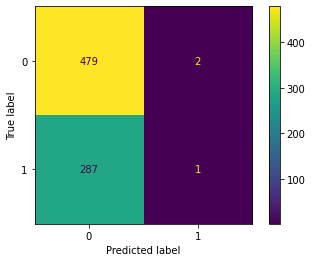

In [37]:
plot_confusion_matrix(clf, X_test, y_test)  

Accuracy 63.20
Down Confusion matrix for GNB naive bayes.

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)

print("Accuracy of the Naive Bayes GNB model is {:.2f}".format(gnb.score(X_test,y_test)*100))

Accuracy of the Naive Bayes GNB model is 63.20


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


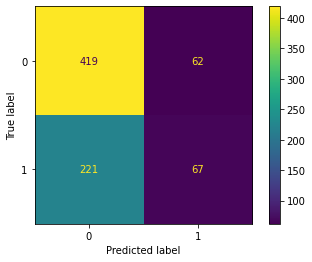

In [39]:
plot_confusion_matrix(gnb, X_test, y_test)  

Accuracy Of Multinomial  Naive Bayes  and Accuracy and confusion matrix


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train,y_train)

print("Accuracy of the Naive Bayes MNB model is {:.2f}".format(mnb.score(X_test,y_test)*100))

Accuracy of the Naive Bayes MNB model is 62.55


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


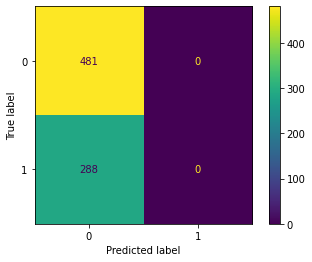

In [ ]:
plot_confusion_matrix(mnb, X_test, y_test)  

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train,y_train)

print("Accuracy of the Naive Bayes BNB model is {:.2f}".format(bnb.score(X_test,y_test)*100))

Accuracy of the Naive Bayes BNB model is 62.55


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


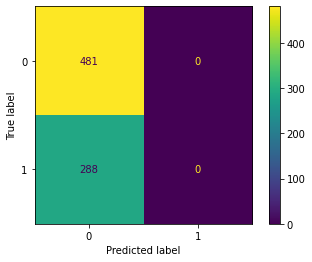

In [ ]:
plot_confusion_matrix(bnb, X_test, y_test)  